In [30]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [31]:
df = pd.read_csv(r"C:\Users\Kireh Kaka\Downloads\heart-disease-dataset.csv")

In [32]:
df.head(15)

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,result
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


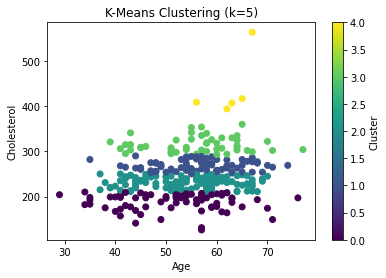

In [33]:
#Using the Python “sklearn” library, create and visualize the k-means clusters (with k=5)
#for the given heart disease dataset. For visualization, draw the scatter plot using the age
#and cholesterol features on each group of clusters. (2 marks)

data = df[["age", "chol"]].values

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('K-Means Clustering (k=5)')
plt.colorbar(label='Cluster')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


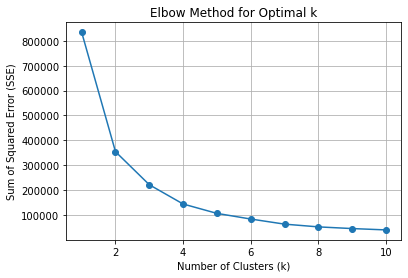

In [34]:
#Apply k-means clusters on the heart disease dataset with varying numbers of clusters from 1 to 10 and compute their corresponding Sum of squared Error (SSE) value. Plot thegraph using Python “matplotlib” library and estimate the right “k” value.
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

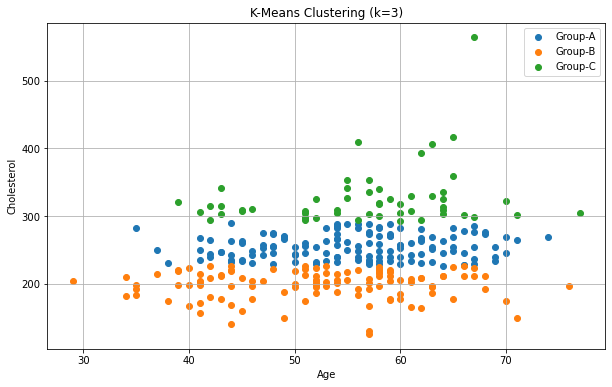

In [35]:
#. Create and visualize the k-means clustering with the “k” value obtained in Q2. The clustering algorithm ultimately groups similar patients by matching its features. Thus, for the visualization, draw the scatter plot using the age and cholesterol features on eachcluster group and label them as “Group-A”, “Group-B” etc
optimal_k = 3 
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data)

cluster_labels = ['Group-A', 'Group-B', 'Group-C']
plt.figure(figsize=(10, 6))
for i in range(optimal_k):
    cluster_data = data[kmeans_optimal.labels_ == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_labels[i])

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()


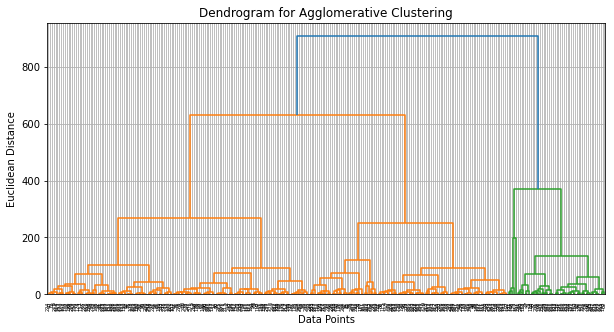

In [36]:
#Plot a dendrogram using Python scipy.cluster.hierarchy method
linked = linkage(data, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

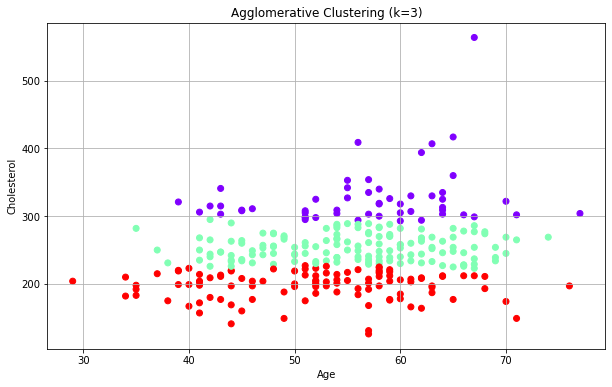

In [37]:

agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data)


plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='rainbow', label='Clusters')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Agglomerative Clustering (k=3)')
plt.grid(True)
plt.show()

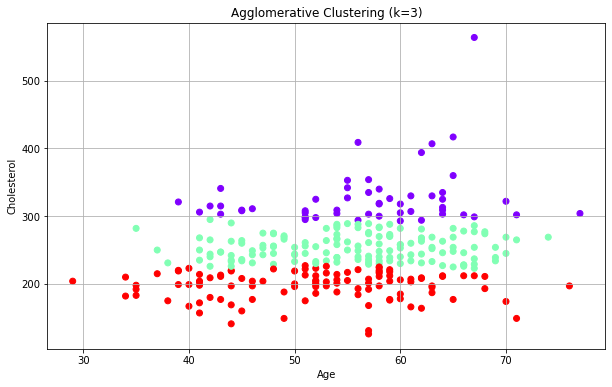

In [38]:
# Create the agglomerative clustering with the number of clusters is equal to the “k” value obtained in Question-2. Visualize the clusters similar to Question-2
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data)

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=agglo_labels, cmap='rainbow', label='Clusters')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Agglomerative Clustering (k=3)')
plt.grid(True)
plt.show()

In [39]:
#Compute silhouette score for both K-means and agglomerative clustering and tell us which clustering is better for the given dataset
kmeans_silhouette = silhouette_score(data, kmeans_optimal.labels_)
agglo_silhouette = silhouette_score(data, agglo_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.2f}")


if kmeans_silhouette > agglo_silhouette:
    print("K-Means performs better.")
else:
    print("Agglomerative Clustering performs better.")

K-Means Silhouette Score: 0.47
Agglomerative Clustering Silhouette Score: 0.47
K-Means performs better.
